In [ ]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, _) , (_ , _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)

(60000, 28, 28)


In [ ]:
X_train = X_train.reshape(*X_train.shape, 1)
print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
X_train = (X_train.astype('float32') - 127.5) / 127.5
print(np.max(X_train))
print(np.min(X_train))

1.0
-1.0


In [ ]:
num_epochs = 50
batch_size = 256
no_of_batches = int(X_train.shape[0]/batch_size)
half_batch_size = int(batch_size/2)
noise_dim = 100
adam = Adam(lr = 2e-4, beta_1=0.5)

In [ ]:
#Generator
generator = Sequential()
generator.add(Dense(7*7*128, input_shape = (noise_dim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())
#Upsample
generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides = (2,2), padding="same")) #Here stride will help in upsampling
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(1,kernel_size=(5,5),padding="same", strides = (2,2), activation="tanh"))
generator.compile(loss="binary_crossentropy", optimizer = adam)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

In [ ]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding = 'same', input_shape = (28,28,1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, kernel_size=(5,5), strides=(2,2), padding = 'same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(loss = "binary_crossentropy", optimizer = adam)
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [ ]:
discriminator.trainable = False
gan_input = Input((noise_dim,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

model = Model(gan_input, gan_output)
model.compile(loss = "binary_crossentropy", optimizer = adam)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [ ]:
def save_imgs(epoch, samples = 100):
  noise = np.random.normal(0,1,(samples, noise_dim))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples, 28, 28)
  plt.figure(figsize = (10,10))
  for i in range(samples):
     plt.subplot(10,10, i+1)
     plt.imshow(generated_imgs[i], cmap = 'gray' , interpolation='nearest')
     plt.axis('off')
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
  plt.show()


In [ ]:
!mkdir images

In [ ]:
!ls

images	sample_data


In [ ]:
!mkdir model

In [ ]:
!ls

images	model  sample_data


EPoch 1  Discriminator Loss 0.2513  Generator Loss 0.2420
EPoch 2  Discriminator Loss 0.6843  Generator Loss 0.9319
EPoch 3  Discriminator Loss 0.6789  Generator Loss 0.9314
EPoch 4  Discriminator Loss 0.6833  Generator Loss 0.9052
EPoch 5  Discriminator Loss 0.6906  Generator Loss 0.8711


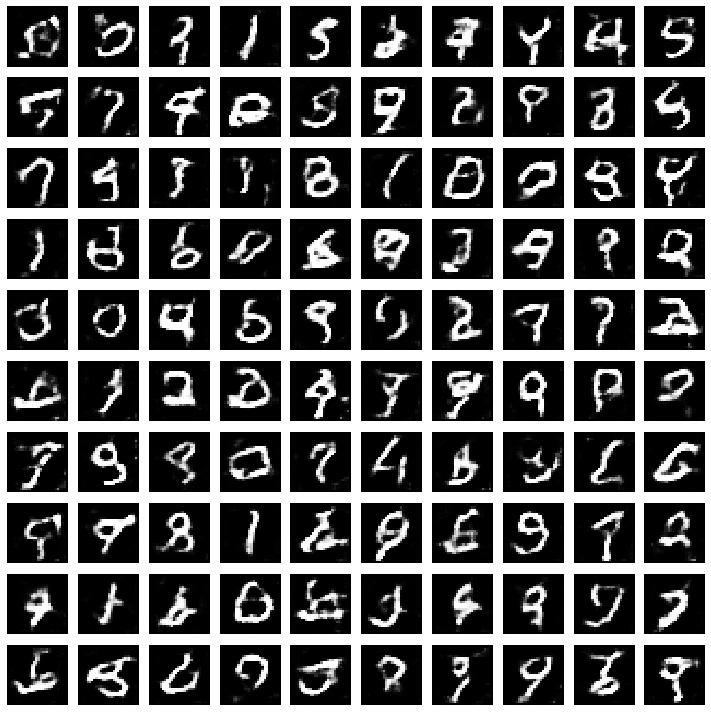

EPoch 6  Discriminator Loss 0.6898  Generator Loss 0.8593
EPoch 7  Discriminator Loss 0.6888  Generator Loss 0.8525
EPoch 8  Discriminator Loss 0.6871  Generator Loss 0.8595
EPoch 9  Discriminator Loss 0.6858  Generator Loss 0.8594
EPoch 10  Discriminator Loss 0.6851  Generator Loss 0.8635


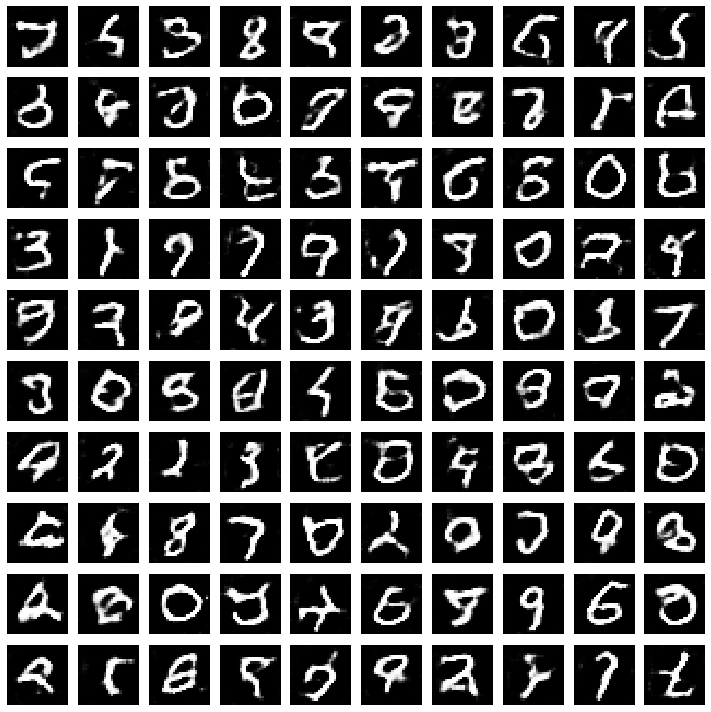

EPoch 11  Discriminator Loss 0.6844  Generator Loss 0.8536
EPoch 12  Discriminator Loss 0.6842  Generator Loss 0.8483
EPoch 13  Discriminator Loss 0.6835  Generator Loss 0.8578
EPoch 14  Discriminator Loss 0.6809  Generator Loss 0.8777
EPoch 15  Discriminator Loss 0.6811  Generator Loss 0.8611


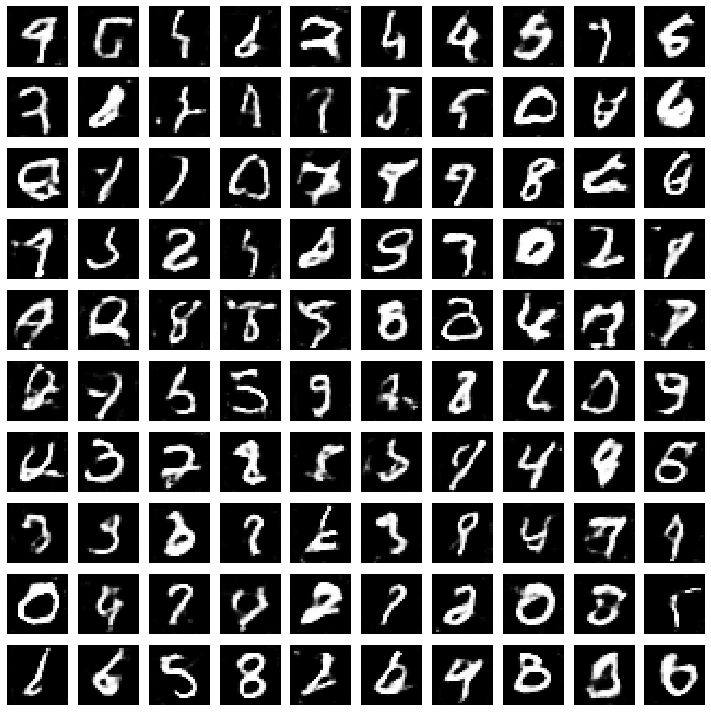

EPoch 16  Discriminator Loss 0.6814  Generator Loss 0.8540
EPoch 17  Discriminator Loss 0.6807  Generator Loss 0.8665
EPoch 18  Discriminator Loss 0.6800  Generator Loss 0.8624
EPoch 19  Discriminator Loss 0.6800  Generator Loss 0.8622
EPoch 20  Discriminator Loss 0.6788  Generator Loss 0.8737


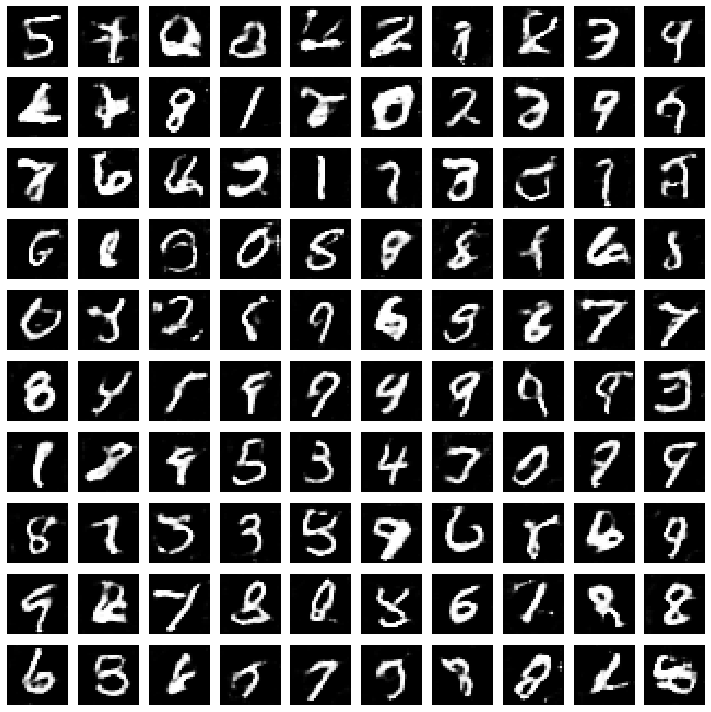

EPoch 21  Discriminator Loss 0.6786  Generator Loss 0.8702
EPoch 22  Discriminator Loss 0.6783  Generator Loss 0.8701
EPoch 23  Discriminator Loss 0.6775  Generator Loss 0.8713
EPoch 24  Discriminator Loss 0.6762  Generator Loss 0.8782
EPoch 25  Discriminator Loss 0.6764  Generator Loss 0.8793


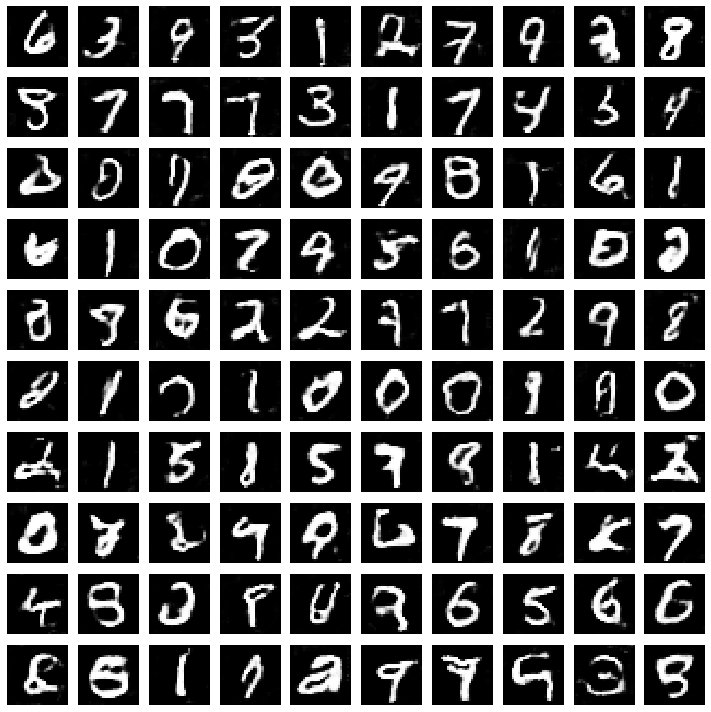

EPoch 26  Discriminator Loss 0.6755  Generator Loss 0.8804
EPoch 27  Discriminator Loss 0.6748  Generator Loss 0.8862
EPoch 28  Discriminator Loss 0.6738  Generator Loss 0.8916
EPoch 29  Discriminator Loss 0.6723  Generator Loss 0.8911
EPoch 30  Discriminator Loss 0.6726  Generator Loss 0.8925


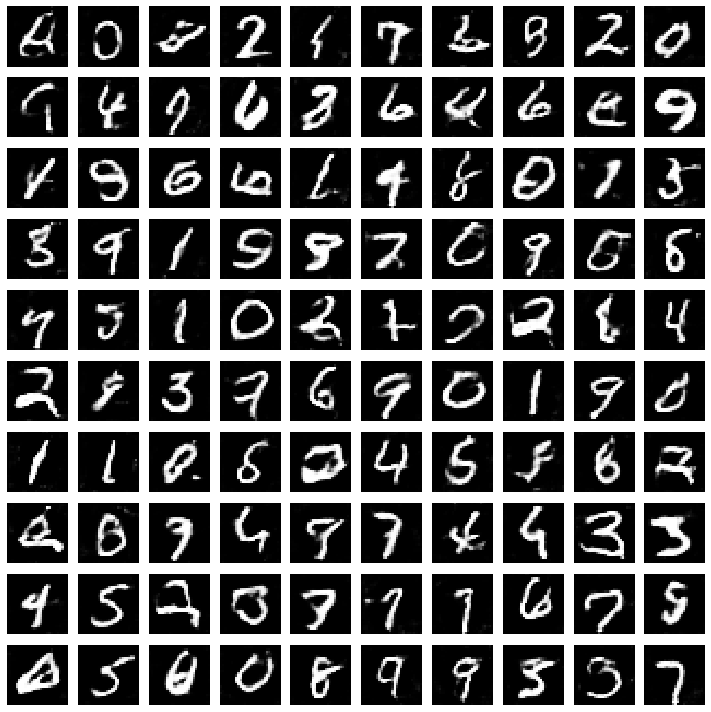

EPoch 31  Discriminator Loss 0.6721  Generator Loss 0.8992
EPoch 32  Discriminator Loss 0.6709  Generator Loss 0.8973
EPoch 33  Discriminator Loss 0.6707  Generator Loss 0.9012
EPoch 34  Discriminator Loss 0.6691  Generator Loss 0.9060
EPoch 35  Discriminator Loss 0.6684  Generator Loss 0.9118


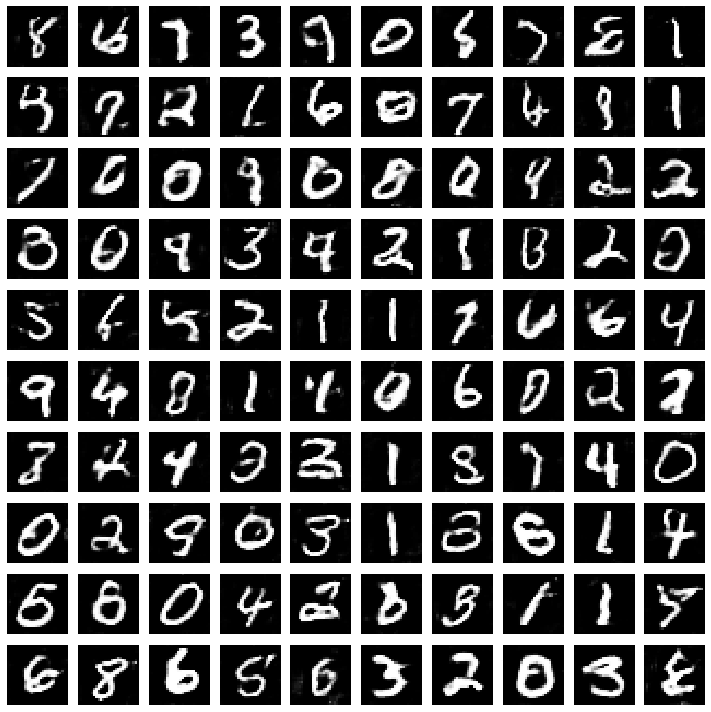

EPoch 36  Discriminator Loss 0.6676  Generator Loss 0.9141
EPoch 37  Discriminator Loss 0.6668  Generator Loss 0.9173


KeyboardInterrupt: ignored

In [ ]:
for epoch in range(num_epochs):
  epochs_d_loss = 0.0
  epochs_g_loss = 0.0
  #SGD
  for step in range(no_of_batches):
    #First Train discriminator

    #Real data
    idx = np.random.randint(0, X_train.shape[0] , half_batch_size)
    real_imgs = X_train[idx]

    #Fake Data
    noise = np.random.normal(0,1, size = (half_batch_size, noise_dim))
    fake_imgs = generator.predict(noise)

    #labels
    real_y = np.ones((half_batch_size, 1)) * 0.9 #One side label smoothing
    fake_y = np.zeros((half_batch_size, 1))

    #Train Discriminator
    d_on_real = discriminator.train_on_batch(real_imgs, real_y)
    d_on_fake = discriminator.train_on_batch(fake_imgs, fake_y)
    d_loss = 0.5*d_on_real + 0.5*d_on_fake

    epochs_d_loss += d_loss

    #Train Generator
    noise = np.random.normal(0,1,size = (batch_size , noise_dim))
    ground_truth = np.ones((batch_size, 1))
    g_loss = model.train_on_batch(noise, ground_truth)
    epochs_g_loss += g_loss
  
  print("EPoch %d  Discriminator Loss %.4f  Generator Loss %.4f"%((epoch+1), epochs_d_loss/no_of_batches, epochs_g_loss/no_of_batches))
  if (epoch+1)%5 == 0:
    generator.save("model/gan_generator_{0}.h5".format(epoch+1))
    save_imgs(epoch)
